In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Step 1: Create a synthetic dataset
np.random.seed(42)
n_samples = 100
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
# Creating a binary target variable based on a linear combination of X1 and X2
p = 1 / (1 + np.exp(-(0.5 * X1 + 1.5 * X2)))
y = np.random.binomial(1, p)

df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
df


,X1,X2,y
0,0.496714,-1.415371,1
1,-0.138264,-0.420645,1
2,0.647689,-0.342715,1
3,1.523030,-0.802277,1
4,-0.234153,-0.161286,0
...,...,...,...
95,-1.463515,0.385317,1
96,0.296120,-0.883857,0
97,0.261055,0.153725,0
98,0.005113,0.058209,1


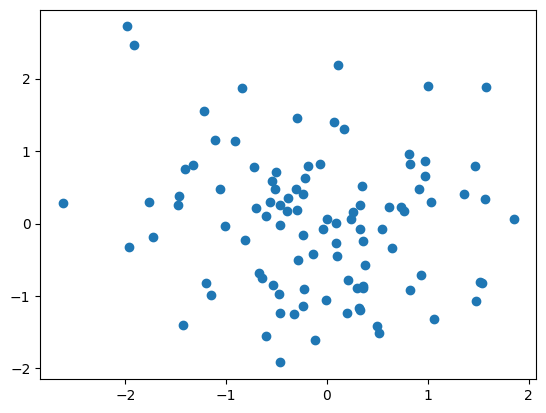

In [13]:
plt.scatter(df["X1"], df["X2"])

In [9]:
# Step 2: Fit logistic regression
X = df[['X1', 'X2']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

model.coef_

In [5]:
model.intercept_

array([-0.32812191])

In [10]:
# Step 3: Calculate log odds (logit)
# Predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]
print("y_pred_proba --> ", y_pred_proba, "\n")
# Calculate log odds
log_odds = np.log(y_pred_proba / (1 - y_pred_proba))
print("log_odds --> ", log_odds)

y_pred_proba -->  [0.61303142 0.56509146 0.1271337  0.72679959 0.45095806 0.06823831
 0.91281485 0.69096155 0.01662668 0.05261838 0.8343807  0.03180682
 0.6684874  0.57721291 0.2402863  0.33376248 0.42991846 0.91333876
 0.46138979 0.5633498 ] 

log_odds -->  [ 0.46007267  0.26185184 -1.9265431   0.97844514 -0.19680047 -2.61407088
  2.34849907  0.80461849 -4.07998028 -2.89063648  1.61699798 -3.41575074
  0.70135175  0.31134249 -1.15111051 -0.69121663 -0.28218384  2.3551001
 -0.1547489   0.25476834]


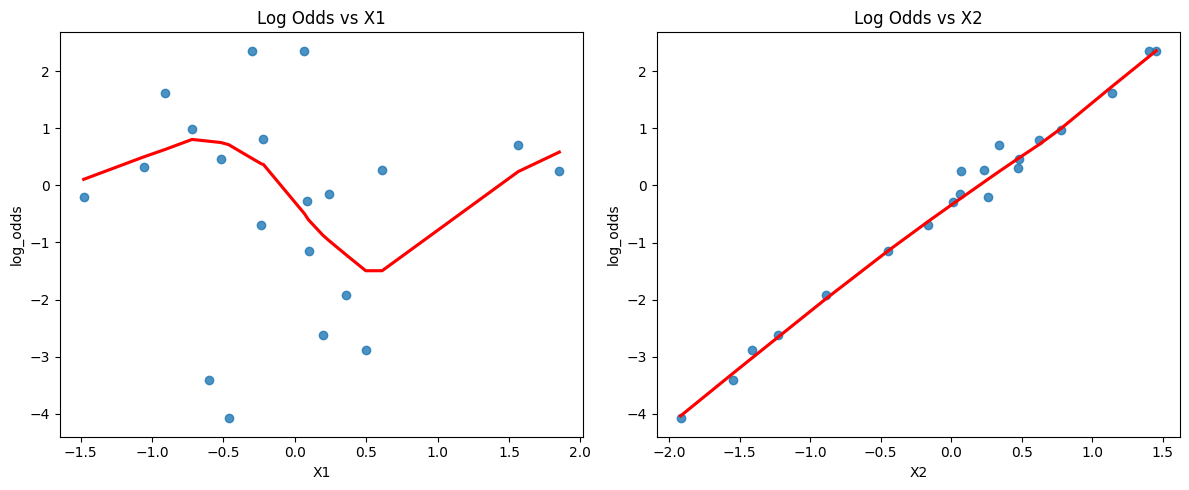

In [11]:
# Add log odds to the dataframe
df_test = X_test.copy()
df_test['log_odds'] = log_odds

# Step 4: Check linearity assumption
# Plot log odds against each predictor
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x='X1', y='log_odds', data=df_test, ax=axes[0], lowess=True, line_kws={"color": "red"})
axes[0].set_title('Log Odds vs X1')
sns.regplot(x='X2', y='log_odds', data=df_test, ax=axes[1], lowess=True, line_kws={"color": "red"})
axes[1].set_title('Log Odds vs X2')

plt.tight_layout()
plt.show()

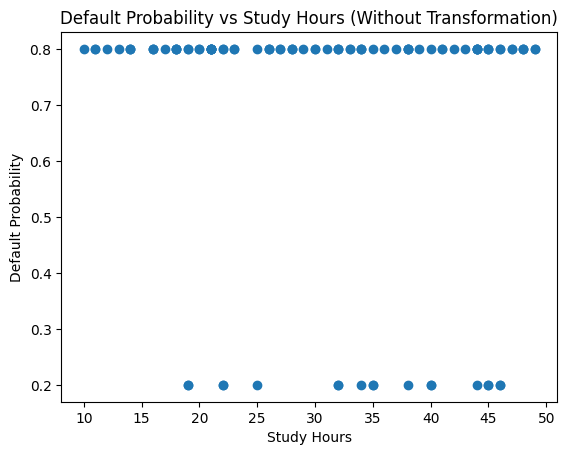

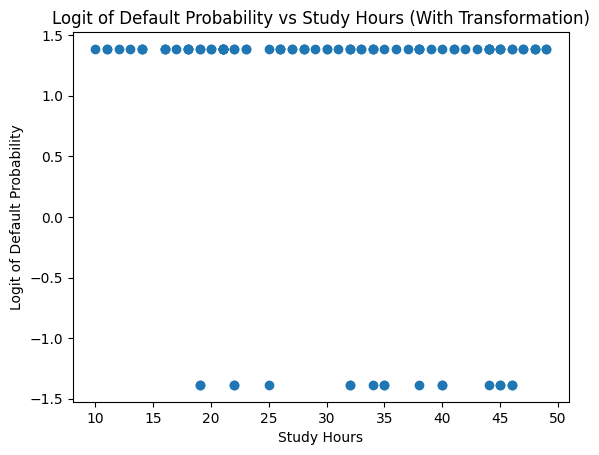

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
study_hours = np.random.randint(10, 50, size=100)  # Random study hours (10-50)
default = np.random.choice(["Yes", "No"], size=100, p=[0.2, 0.8])  # Default (20% Yes, 80% No)

# Calculate probability of default (assuming some logic - replace with yours)
default_prob = np.where(default == "Yes", 0.2, 0.8)  # Assign probabilities based on default label

# Calculate logit of default probability
logit_default_prob = np.log(default_prob / (1 - default_prob))

# Simple plot (without transformation)
plt.scatter(study_hours, default_prob)
plt.xlabel("Study Hours")
plt.ylabel("Default Probability")
plt.title("Default Probability vs Study Hours (Without Transformation)")
plt.show()

# Simple plot (with transformation)
plt.scatter(study_hours, logit_default_prob)
plt.xlabel("Study Hours")
plt.ylabel("Logit of Default Probability")
plt.title("Logit of Default Probability vs Study Hours (With Transformation)")
plt.show()


C:\Users\rakes\AppData\Local\Temp\ipykernel_32144\1770002336.py:20: RuntimeWarning: divide by zero encountered in divide
  log_odds = np.log(y / (1 - y))
C:\Users\rakes\AppData\Local\Temp\ipykernel_32144\1770002336.py:20: RuntimeWarning: divide by zero encountered in log
  log_odds = np.log(y / (1 - y))


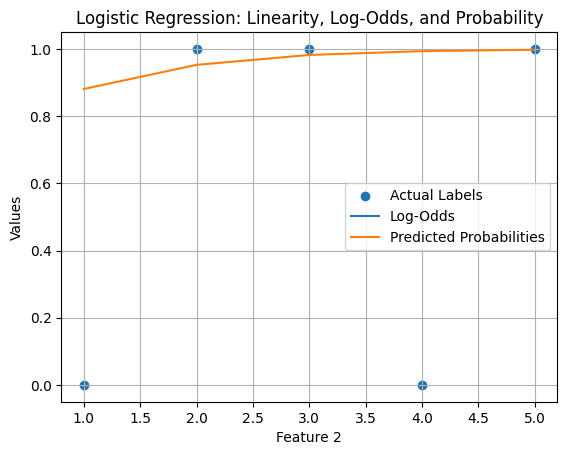

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
X = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5]])
y = np.array([0, 1, 1, 0, 1])

# Linear model (weights and bias are assumed for simplicity)
w = np.array([2, 1])  # Weights
b = -1  # Bias

# Calculate linear combination of weights and features
z = np.dot(X, w) + b

# Function for sigmoid transformation (probability)
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Calculate log-odds
log_odds = np.log(y / (1 - y))

# Calculate predicted probabilities
y_pred = sigmoid(z)

# Plot data points, log-odds, and decision boundary
plt.scatter(X[:, 1], y, label='Actual Labels')
plt.plot(X[:, 1], log_odds, label='Log-Odds')
plt.plot(X[:, 1], y_pred, label='Predicted Probabilities')
plt.xlabel('Feature 2')
plt.ylabel('Values')
plt.title('Logistic Regression: Linearity, Log-Odds, and Probability')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create synthetic data
np.random.seed(42)
X = np.random.randn(100, 1)  # 100 samples, 1 feature
# True relationship (log odds): log(p / (1 - p)) = 2 * X
p = 1 / (1 + np.exp(-2 * X)).flatten()
y = np.random.binomial(1, p)

# Create a DataFrame for easier handling
df = pd.DataFrame({'X': X.flatten(), 'y': y})
print(df.head())


          X  y
0  0.496714  1
1 -0.138264  0
2  0.647689  1
3  1.523030  1
4 -0.234153  1


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create synthetic data
np.random.seed(42)
X = np.random.randn(100, 1)  # 100 samples, 1 feature
# True relationship (log odds): log(p / (1 - p)) = 2 * X
p = 1 / (1 + np.exp(-2 * X)).flatten()
y = np.random.binomial(1, p)

# Create a DataFrame for easier handling
df = pd.DataFrame({'X': X.flatten(), 'y': y})
print(df.head())


          X  y
0  0.496714  1
1 -0.138264  0
2  0.647689  1
3  1.523030  1
4 -0.234153  1


In [18]:
# Fit logistic regression
model = LogisticRegression()
model.fit(X, y)

# Coefficients of the model
intercept = model.intercept_[0]
coef = model.coef_[0][0]

print(f"Intercept: {intercept}, Coefficient: {coef}")


Intercept: -0.18933948721180366, Coefficient: 1.9896549679520814


In [19]:
# Calculate the linear combination (log odds)
log_odds = intercept + coef * X.flatten()

# Add log odds to the DataFrame
df['log_odds'] = log_odds
print(df.head())


          X  y  log_odds
0  0.496714  1  0.798950
1 -0.138264  0 -0.464438
2  0.647689  1  1.099337
3  1.523030  1  2.840964
4 -0.234153  1 -0.655224


In [20]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate probabilities
probabilities = sigmoid(log_odds)

# Add probabilities to the DataFrame
df['probabilities'] = probabilities
print(df.head())


          X  y  log_odds  probabilities
0  0.496714  1  0.798950       0.689750
1 -0.138264  0 -0.464438       0.385934
2  0.647689  1  1.099337       0.750136
3  1.523030  1  2.840964       0.944850
4 -0.234153  1 -0.655224       0.341813


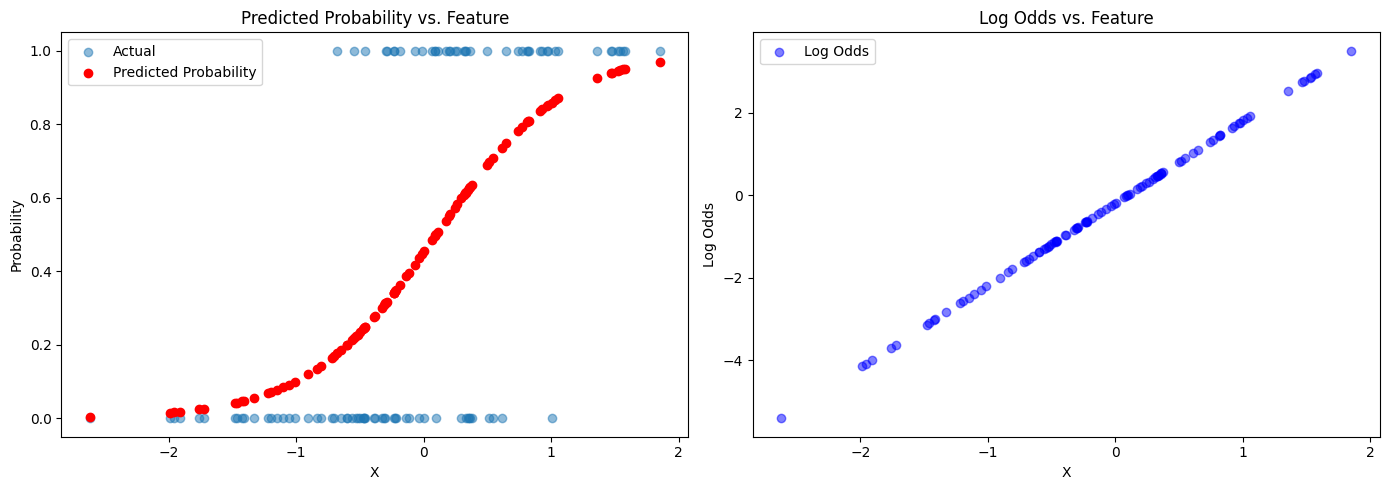

In [22]:
# Plotting
plt.figure(figsize=(14, 5))

# Plot probabilities
plt.subplot(1, 2, 1)
plt.scatter(X, y, label='Actual', alpha=0.5)
plt.scatter(X, probabilities, color='red', label='Predicted Probability', alpha=1)
#plt.plot(X, probabilities, color='red', label='Predicted Probability', linewidth=2)
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Predicted Probability vs. Feature')
plt.legend()

# Plot log odds
plt.subplot(1, 2, 2)
plt.scatter(X, log_odds, color='blue', label='Log Odds', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Log Odds')
plt.title('Log Odds vs. Feature')
plt.legend()

plt.tight_layout()
plt.show()


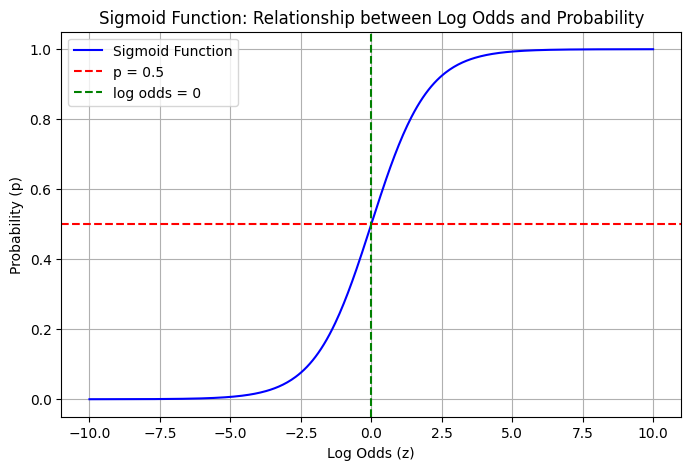

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate a range of log odds values
log_odds_values = np.linspace(-10, 10, 400)

# Calculate probabilities using the sigmoid function
probabilities = sigmoid(log_odds_values)

# Plot the relationship between log odds and probability
plt.figure(figsize=(8, 5))
plt.plot(log_odds_values, probabilities, label='Sigmoid Function', color='blue')
plt.axhline(0.5, color='red', linestyle='--', label='p = 0.5')
plt.axvline(0, color='green', linestyle='--', label='log odds = 0')
plt.xlabel('Log Odds (z)')
plt.ylabel('Probability (p)')
plt.title('Sigmoid Function: Relationship between Log Odds and Probability')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# import numpy as np

# # Generate random data for demonstration
# np.random.seed(42)
# num_points = 20
# x1 = np.random.uniform(low=50, high=150, size=num_points)  # Email length
# x2 = np.random.randint(low=0, high=5, size=num_points)      # Exclamation marks
# y = np.random.choice([0, 1], size=num_points)

# # Combine features into a matrix X
# X = np.column_stack((x1, x2))

# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))

# # Assume some coefficients (you can adjust these)
# coef = np.array([0.5, -0.1])  # Coefficients for x1 and x2
# intercept = 0.2              # Intercept

# # Calculate z for each data point
# z = np.dot(X, coef) + intercept

# # Compute the sigmoid probabilities
# probabilities = sigmoid(z)

# import matplotlib.pyplot as plt

# # Generate input values within the desired range
# start = np.min(z)
# end = np.max(z)
# num_points = 100
# x_vals = np.linspace(start, end, num_points)

# # Compute sigmoid values for the input range
# sigmoid_vals = sigmoid(x_vals)

# # Plot the sigmoid curve
# plt.figure(figsize=(8, 6))
# plt.plot(x_vals, sigmoid_vals, label='Sigmoid Function', color='b')
# plt.scatter(z, probabilities, c=y, cmap='coolwarm', edgecolors='k', label='Data Points')
# plt.xlabel('z (Linear Combination)')
# plt.ylabel('Probability (p)')
# plt.title('Logistic Regression Sigmoid Function')
# plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision Boundary')
# plt.legend()
# plt.grid(True)
# plt.show()



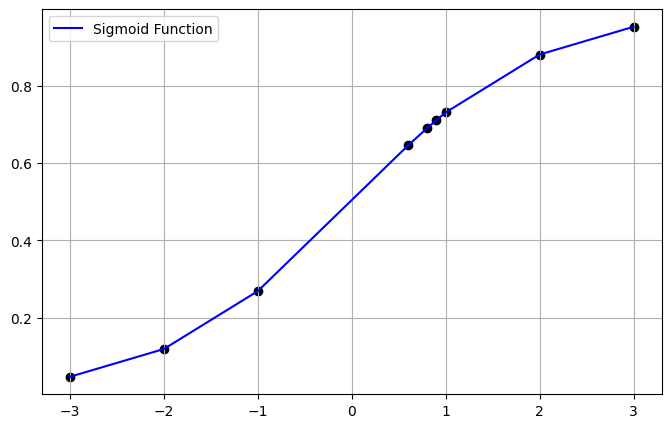

In [36]:
x = [-3,-2,-1,0.6,.8,.9,1,2,3]
sigm_vals = sigmoid(np.array(x))

plt.figure(figsize=(8, 5))
plt.plot(x, sigm_vals, label='Sigmoid Function', color='blue')
plt.scatter(x, sigm_vals, color="black")
plt.legend()
plt.grid(True)
plt.show()


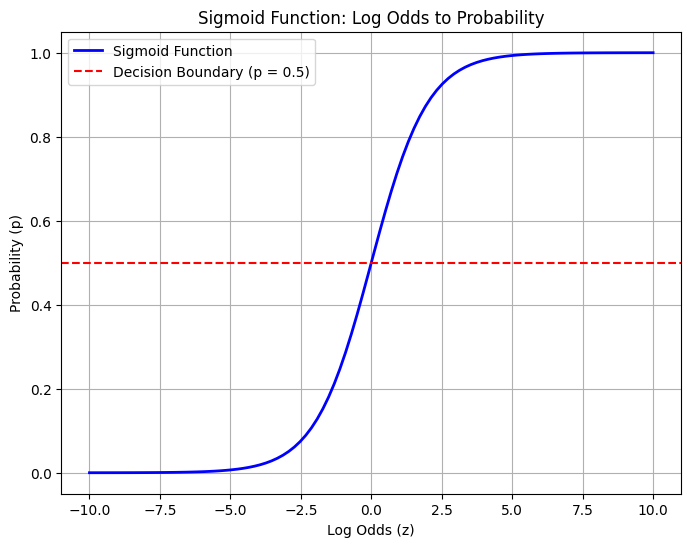

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for z (log odds)
z = np.linspace(-10, 10, 100)
probabilities = sigmoid(z)

# Plot sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(z, probabilities, label='Sigmoid Function', color='blue', linewidth=2)
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (p = 0.5)')
plt.xlabel('Log Odds (z)')
plt.ylabel('Probability (p)')
plt.title('Sigmoid Function: Log Odds to Probability')
plt.legend()
plt.grid(True)
plt.show()


Intercept (beta_0): -3.99148169922198
Coefficient (beta_1): 1.146477779251495


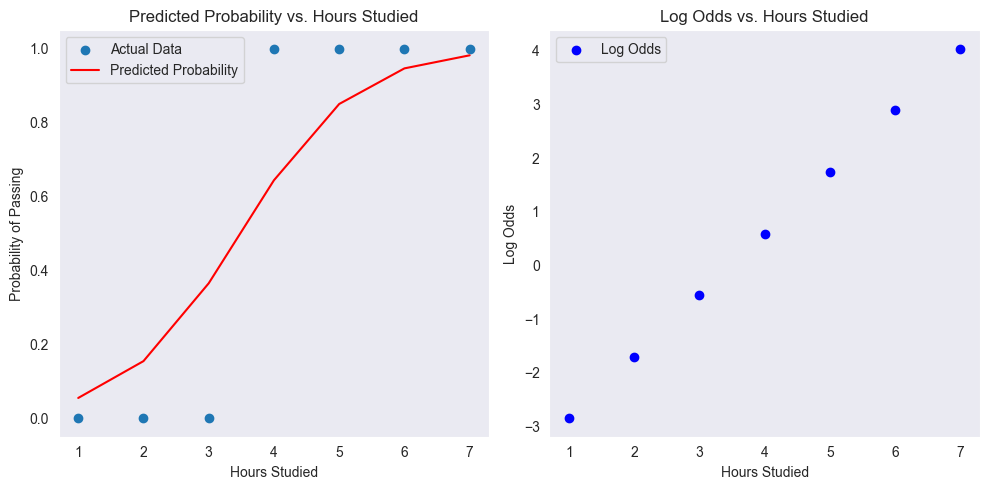

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Sample data
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7],
    'Passed_Exam': [0, 0, 0, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# Features and target
X = df[['Hours_Studied']]
y = df['Passed_Exam']

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Coefficients
intercept = model.intercept_[0]
coef = model.coef_[0][0]

print(f'Intercept (beta_0): {intercept}')
print(f'Coefficient (beta_1): {coef}')

# Calculate log odds and probabilities
log_odds = intercept + coef * X
probabilities = 1 / (1 + np.exp(-log_odds))

# Plot the relationship
sns.set_style("dark")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, label='Actual Data')
plt.plot(X, probabilities, color='red', label='Predicted Probability')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Predicted Probability vs. Hours Studied')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, log_odds, color='blue', label='Log Odds')
plt.xlabel('Hours Studied')
plt.ylabel('Log Odds')
plt.title('Log Odds vs. Hours Studied')
plt.legend()

plt.tight_layout()
plt.show()


Sigmoid of 4.5 : 0.99
Sigmoid of -1.0 : 0.27


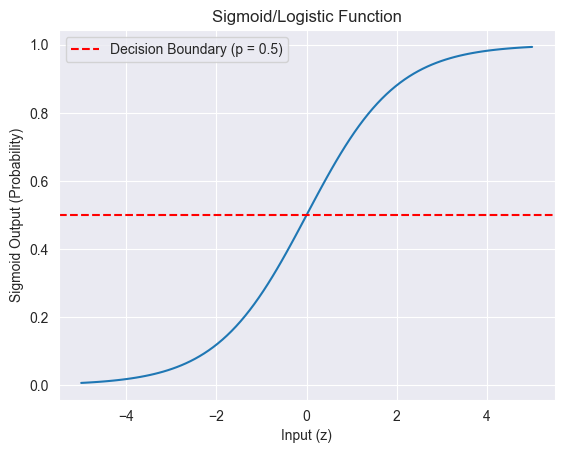

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
  """
  This function takes a real number (z) as input and returns its sigmoid value (probability between 0 and 1).
  """
  return 1 / (1 + np.exp(-z))

# Define two values to calculate sigmoid for
value1 = 4.5
value2 = -1.0

# Calculate sigmoid values
sigmoid_value1 = round(sigmoid(value1),2)
sigmoid_value2 = round(sigmoid(value2),2)

# Print the results
print("Sigmoid of", value1, ":", sigmoid_value1)
print("Sigmoid of", value2, ":", sigmoid_value2)

# Optional: Plot the sigmoid function
z = np.linspace(-5, 5, 100)  # Create a range of input values
sigmoid_output = sigmoid(z)

plt.plot(z, sigmoid_output)
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (p = 0.5)')
plt.xlabel('Input (z)')
plt.ylabel('Sigmoid Output (Probability)')
plt.title('Sigmoid/Logistic Function')
plt.grid(True)
plt.legend()
plt.show()



In [10]:
import math

def log_calculation(value1, value2):
  """
  This function calculates the natural logarithm (ln) of two given values.
  """
  try:
    # Check for non-positive values (logarithm is undefined)
    if value1 <= 0 or value2 <= 0:
      raise ValueError("Logarithm is undefined for non-positive values.")
    # Calculate logarithms using math.log(value)
    log_value1 = round(math.log(value1), 2)
    log_value2 = round(math.log(value2), 2)
    # Print the results
    print("Natural logarithm (ln) of", value1, ":", log_value1)
    print("Natural logarithm (ln) of", value2, ":", log_value2)
  except ValueError as e:
    print(e)

# Example values
value1 = 5
value2 = 2

# Call the function
log_calculation(value1, value2)

Natural logarithm (ln) of 5 : 1.61
Natural logarithm (ln) of 2 : 0.69


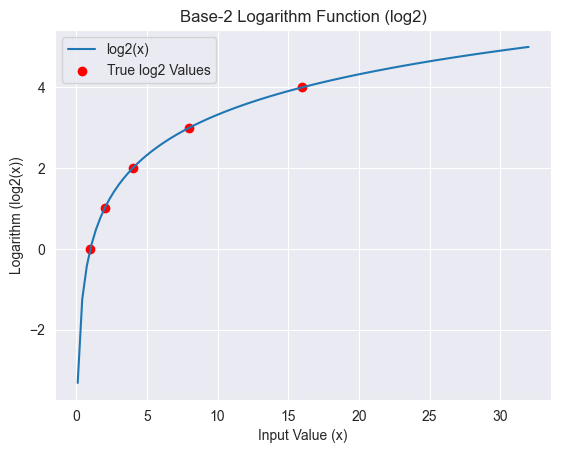

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def log2(x):
  """
  This function calculates the base-2 logarithm (log2) of a value, handling non-positive values.
  """
  # Vectorized approach using np.where for efficiency
  mask = np.where(x <= 0, np.nan, 1)  # Replace non-positive with NaN, others with 1
  return mask * np.log2(x)  # Apply mask for NaN and calculate log2

# Sample data (x-values and corresponding true log2 values)
x_data = np.array([1, 2, 4, 8, 16])
true_log2_data = np.log2(x_data)  # Calculate true log2 values

# Generate additional x-values for a smoother plot
x_plot = np.linspace(0.1, 32, 100)  # Range from slightly above 0 to avoid issues

# Calculate log2 values for the plot
log2_data_plot = log2(x_plot)

# Plot true data points (markers) and the log2 function (line)
plt.plot(x_plot, log2_data_plot, label='log2(x)')
plt.scatter(x_data, true_log2_data, label='True log2 Values', color='red')
plt.xlabel('Input Value (x)')
plt.ylabel('Logarithm (log2(x))')
plt.title('Base-2 Logarithm Function (log2)')
plt.grid(True)
plt.legend()
plt.show()


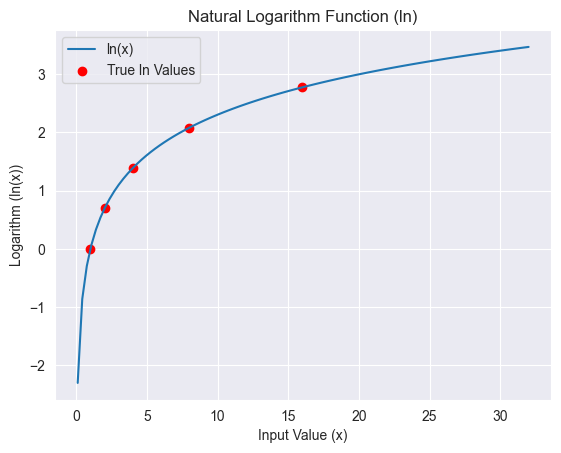

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def ln(x):
  """
  This function calculates the natural logarithm (ln) of a value, handling non-positive values.
  """
  # Vectorized approach using np.where for efficiency (similar to log2 function)
  mask = np.where(x <= 0, np.nan, 1)  # Replace non-positive with NaN, others with 1
  return mask * np.log(x)  # Apply mask for NaN and calculate ln

# Sample data (x-values and corresponding true ln values)
x_data = np.array([1, 2, 4, 8, 16])
true_ln_data = np.log(x_data)  # Calculate true ln values

# Generate additional x-values for a smoother plot
x_plot = np.linspace(0.1, 32, 100)  # Range from slightly above 0 to avoid issues

# Calculate ln values for the plot
ln_data_plot = ln(x_plot)

# Plot true data points (markers) and the ln function (line)
plt.plot(x_plot, ln_data_plot, label='ln(x)')
plt.scatter(x_data, true_ln_data, label='True ln Values', color='red')
plt.xlabel('Input Value (x)')
plt.ylabel('Logarithm (ln(x))')
plt.title('Natural Logarithm Function (ln)')
plt.grid(True)
plt.legend()
plt.show()


Natural Logarithm (ln):

ln(2): This represents the exponent by which e (approximately 2.71828) needs to be raised to get the value 2. In Python:

In [17]:
value = 2
natural_log = np.log(value)
print("Natural logarithm (ln) of", value, ":", natural_log)


Natural logarithm (ln) of 2 : 0.6931471805599453


Base-2 Logarithm (log2):

log2(4): This represents the exponent by which 2 needs to be raised to get the value 4. In Python (assuming you have the log2 function defined from earlier):

In [18]:
value = 4
base2_log = log2(value)
print("Base-2 logarithm (log2) of", value, ":", base2_log)


Base-2 logarithm (log2) of 4 : 2.0


Optimization terminated successfully.
         Current function value: 0.272803
         Iterations 8


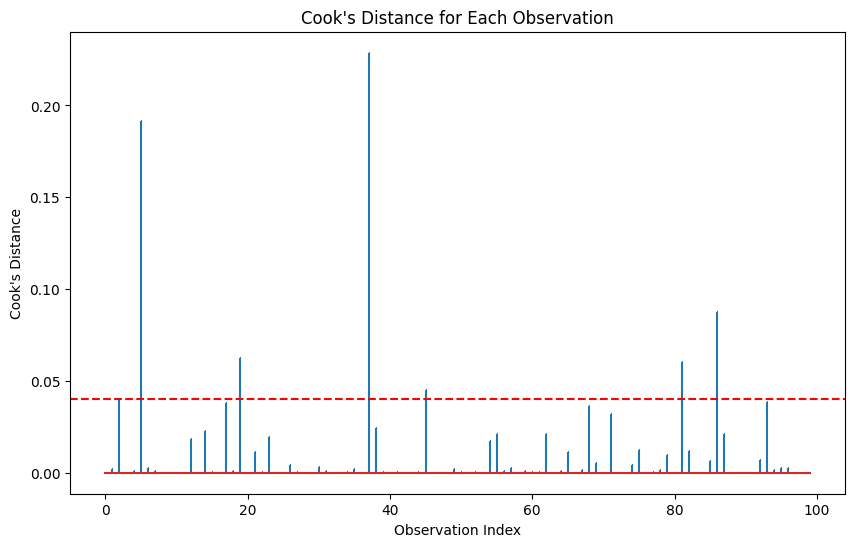

Influential points at indices: [ 5 19 37 45 81 86]


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n_samples = 100
X = np.random.normal(size=n_samples)
X = np.vstack((X, np.random.normal(size=n_samples))).T
y = (X[:, 0] + X[:, 1] + np.random.normal(size=n_samples)) > 0
data = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': y.astype(int)})

# Fit logistic regression model
model = smf.logit(formula='y ~ x1 + x2', data=data).fit()

# Calculate Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Add Cook's distance to the dataframe
data['cooks_d'] = cooks_d

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(n_samples), cooks_d, markerfmt=",")
plt.axhline(4 / n_samples, color='r', linestyle='--')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance for Each Observation')
plt.show()

# Identify influential points
threshold = 4 / n_samples
influential_points = np.where(cooks_d > threshold)[0]
print(f"Influential points at indices: {influential_points}")


In [3]:
data.head(10)

,x1,x2,y,cooks_d
0,1.764052,1.883151,1,6.340833e-09
1,0.400157,-1.347759,0,1.982872e-03
2,0.978738,-1.270485,1,3.967158e-02
3,2.240893,0.969397,1,2.177387e-08
4,1.867558,-1.173123,1,1.181418e-03
5,-0.977278,1.943621,0,1.916556e-01
6,0.950088,-0.413619,1,2.775850e-03
7,-0.151357,-0.747455,0,1.022782e-03
8,-0.103219,1.922942,1,1.191898e-04
9,0.410599,1.480515,1,4.257503e-05


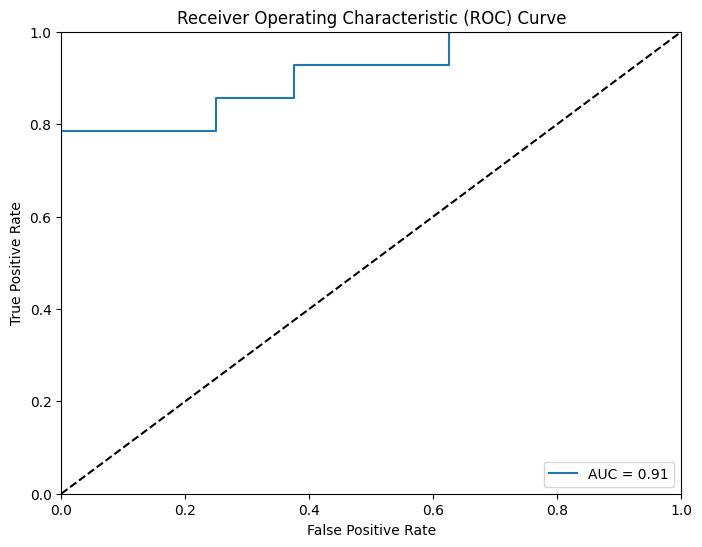

AUC: 0.91


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

# Generate synthetic data
np.random.seed(0)
n_samples = 100
X = np.random.normal(size=(n_samples, 2))
y = (X[:, 0] + X[:, 1] + np.random.normal(size=n_samples)) > 0
y = y.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {auc:.2f}")

[0.   0.   0.   0.25 0.25 1.  ] [0.   0.25 0.5  0.5  1.   1.  ] [       inf 0.87107159 0.84056729 0.76749022 0.47144424 0.066908  ]
AUC score: 0.875


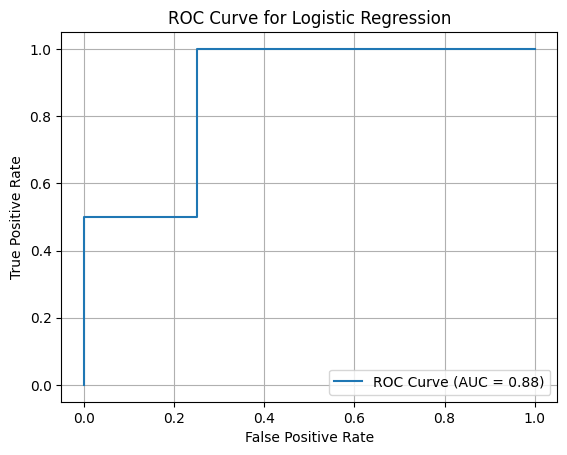

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Sample data (replace with your actual data)
X = [[1, 2], [3, 4], [5, 6], [7, 8], [1, 0], [2, 1], [4, 2], [6, 3]]
y = [1, 1, 0, 0, 1, 0, 1, 0]  # Class labels (0 or 1)

# Create Logistic Regression model
model = LogisticRegression()

# Fit the model
model.fit(X, y)

# Get predictions and probabilities
y_pred = model.predict(X)
y_proba = model.predict_proba(X)[:, 1]  # Probability of positive class

# Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y, y_proba)
print(fpr, tpr, thresholds)

# Calculate AUC score
auc_score = auc(fpr, tpr)
print('AUC score:', auc_score)

# Basic plot (replace with your preferred plotting library)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_curve, roc_auc_score

# # Generate synthetic data
# np.random.seed(0)
# n_samples = 100
# X = np.random.normal(size=(n_samples, 2))
# y = (X[:, 0] + X[:, 1] + np.random.normal(size=n_samples)) > 0
# y = y.astype(int)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# # Fit logistic regression model
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Predict probabilities
# y_prob = model.predict_proba(X_test)[:, 1]

# # Compute ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# auc = roc_auc_score(y_test, y_prob)

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classifier
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# print(f"AUC: {auc:.2f}")

# # Print the first few thresholds to see how they correspond to TPR and FPR
# for i in range(len(thresholds)):
#     print(f"Threshold: {thresholds[i]:.2f}, TPR: {tpr[i]:.2f}, FPR: {fpr[i]:.2f}")


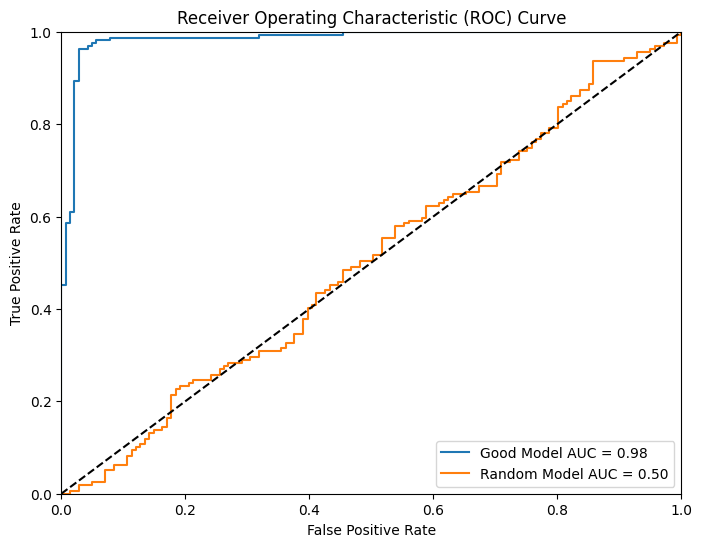

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

# Generate synthetic data
np.random.seed(0)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit logistic regression model
model_good = LogisticRegression()
model_good.fit(X_train, y_train)

# Predict probabilities
y_prob_good = model_good.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_good, tpr_good, _ = roc_curve(y_test, y_prob_good)
auc_good = roc_auc_score(y_test, y_prob_good)

# Create a random model for comparison
y_prob_random = np.random.rand(len(y_test))

# Compute ROC curve for the random model
fpr_random, tpr_random, _ = roc_curve(y_test, y_prob_random)
auc_random = roc_auc_score(y_test, y_prob_random)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_good, tpr_good, label=f'Good Model AUC = {auc_good:.2f}')
plt.plot(fpr_random, tpr_random, label=f'Random Model AUC = {auc_random:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Log Loss: 0.44338044610791505
Lift: 1.5992961026861963
Cumulative Gains: [0.00719424 0.01438849 0.02158273 0.02877698 0.03597122 0.04316547
 0.05035971 0.05755396 0.0647482  0.07194245]


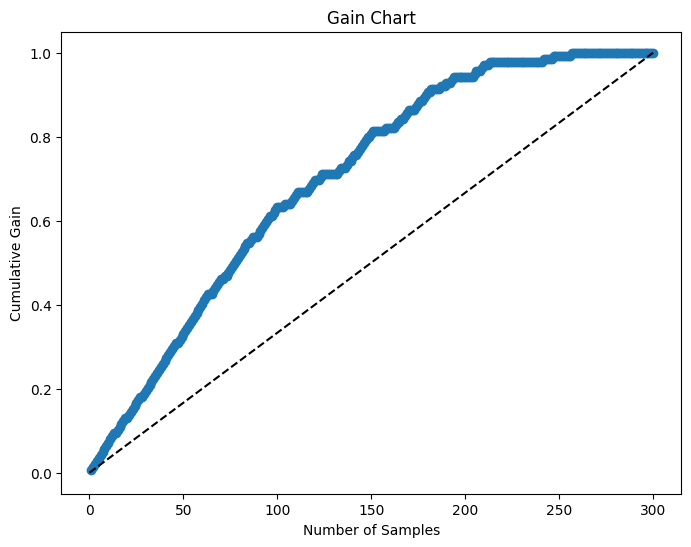

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.random.normal(size=(1000, 2))
y = (X[:, 0] + X[:, 1] + np.random.normal(size=1000)) > 0
y = y.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Log Loss
ll = log_loss(y_test, y_prob)
print("Log Loss:", ll)

# Compute Lift
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)
tp = np.sum((y_pred == 1) & (y_test == 1))
fp = np.sum((y_pred == 1) & (y_test == 0))
tn = np.sum((y_pred == 0) & (y_test == 0))
fn = np.sum((y_pred == 0) & (y_test == 1))

tpr = tp / (tp + fn)
percentage_positives = np.mean(y_test)
lift = tpr / percentage_positives
print("Lift:", lift)

# Compute Gain
sorted_indices = np.argsort(-y_prob)
sorted_y_test = y_test[sorted_indices]
cumulative_gains = np.cumsum(sorted_y_test) / np.sum(sorted_y_test)

print("Cumulative Gains:", cumulative_gains[:10])  # Display first 10 cumulative gains

# Plotting the Gain Chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_gains) + 1), cumulative_gains, marker='o')
plt.plot([0, len(cumulative_gains)], [0, 1], 'k--')
plt.xlabel('Number of Samples')
plt.ylabel('Cumulative Gain')
plt.title('Gain Chart')
plt.show()